In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [149]:
absorbance_546 = [0.267,0.409,0.556,0.722,0.863,3.149]
concentration = [20,30,40,50,60,200]

[ 0.01096423 -0.00401541  1.06854253]
[ 0.01505 -0.0386 ]


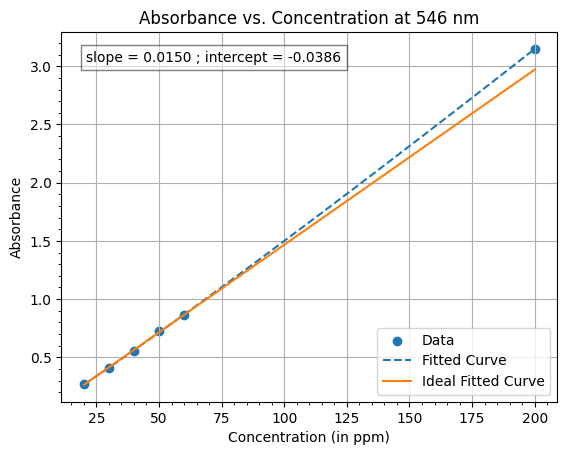

In [150]:
def devi(x,a,b,c):
    return a*x**c+b

params, covariance = curve_fit(devi,concentration,absorbance_546)

afit, bfit, cfit = params
print(params)

# Generate points for the fitted line
x_fit = np.linspace(min(concentration), max(concentration), 100)
y_fit = afit * x_fit**cfit + bfit



# IDEAL

def lin(x,a,b):
    return a*x+b

params, covariance = curve_fit(lin,concentration[:-1],absorbance_546[:-1])

afit_id, bfit_id= params
print(params)

# Generate points for the fitted line
y_fit_id = afit_id * x_fit + bfit_id




plt.clf()
# Add a text box
text_box = f'slope = {afit_id:.4f} ; intercept = {bfit_id:.4f}'
plt.text(0.05, 0.95, text_box, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.scatter(concentration,absorbance_546,label='Data')
plt.plot(x_fit,y_fit,linestyle='dashed',label='Fitted Curve')

plt.plot(x_fit,y_fit_id,label='Ideal Fitted Curve')

plt.xlabel('Concentration (in ppm)')
plt.ylabel('Absorbance')
plt.title('Absorbance vs. Concentration at 546 nm')
plt.minorticks_on()
plt.grid()
plt.legend(loc='lower right')
plt.show()
